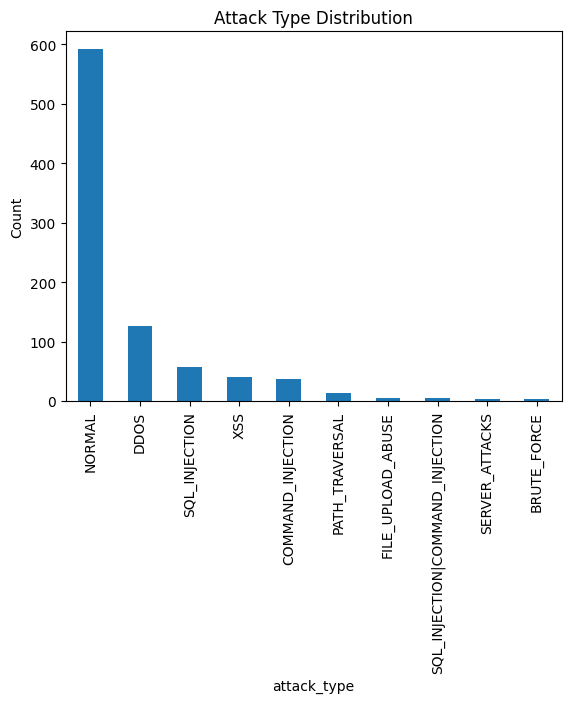

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("traffic_events.csv")

df['attack_type'].value_counts().plot(kind='bar')
plt.title("Attack Type Distribution")
plt.ylabel("Count")
plt.show()



In [41]:
#df.head()
df.tail()

,timestamp,client_ip,method,url,path,attack_type,body_len,body_entropy,special_char_count
881,2026-01-09T12:38:07.735720Z,127.0.0.1,GET,https://firefox.settings.services.mozilla.com/...,/v1/buckets/monitor/collections/changes/change...,NORMAL,0,0.0,NaN
882,2026-01-09T12:38:07.762225Z,127.0.0.1,GET,https://firefox.settings.services.mozilla.com/...,/v1/buckets/blocklists/collections/addons-bloo...,NORMAL,0,0.0,NaN
883,2026-01-09T12:38:07.825206Z,127.0.0.1,GET,https://content-signature-2.cdn.mozilla.net/g/...,/g/chains/202402/remote-settings.content-signa...,NORMAL,0,0.0,NaN
884,2026-01-09T12:41:36.592116Z,127.0.0.1:59658,GET,http://192.168.122.170/dvwa/vulnerabilities/sq...,/dvwa/vulnerabilities/sqli/?id=%250d%250aSet-C...,SERVER_ATTACKS,0,0.0,NaN
885,2026-01-09T12:41:36.950901Z,127.0.0.1:59680,GET,https://firefox.settings.services.mozilla.com/...,/v1/buckets/main/collections/ms-language-packs...,NORMAL,0,0.0,NaN


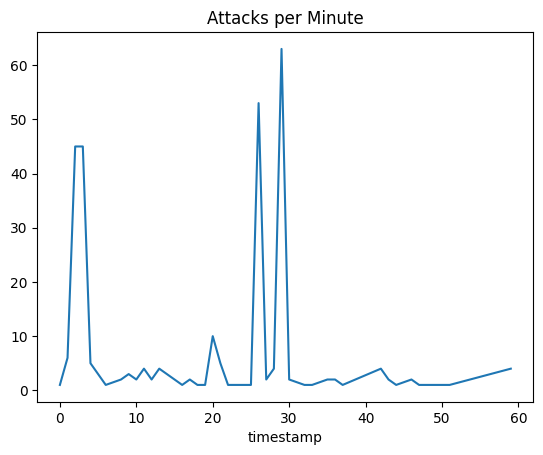

In [36]:

# Attacks over time
df['timestamp'] = pd.to_datetime(df['timestamp'])

attacks = df[df['attack_type'] != "NORMAL"]

attacks.groupby(attacks['timestamp'].dt.minute).size().plot(
    title="Attacks per Minute"
)

plt.show()


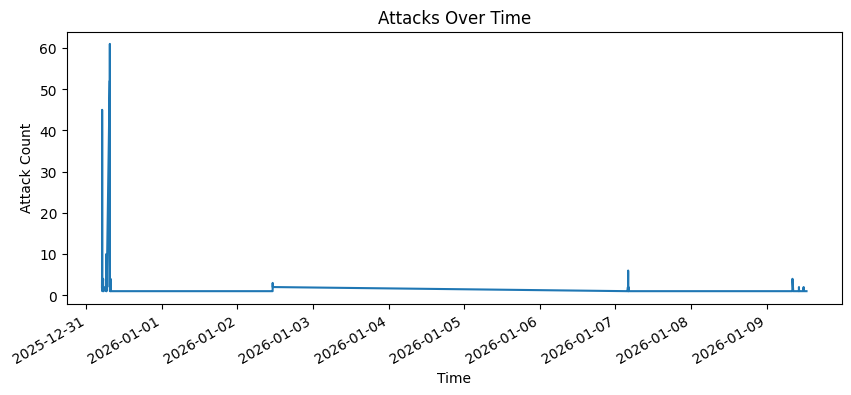

In [42]:
#Attacks Over Time
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("traffic_events.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Filter only attacks
attacks = df[df["attack_type"] != "NORMAL"]

# Group by minute and count
counts = attacks.groupby(
    attacks["timestamp"].dt.floor("1min")
).size()

# Plot
plt.figure(figsize=(10, 4))
counts.plot()
plt.xlabel("Time")
plt.ylabel("Attack Count")
plt.title("Attacks Over Time")
plt.show()


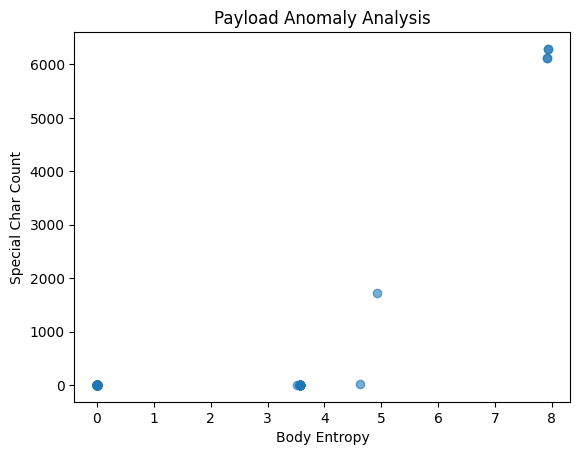

In [44]:
plt.scatter(
    attacks["body_entropy"],
    attacks["special_char_count"],
    alpha=0.6
)
plt.xlabel("Body Entropy")
plt.ylabel("Special Char Count")
plt.title("Payload Anomaly Analysis")
plt.show()
